In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists
import seaborn as sb
import category_encoders as ce
import json
"""
import sys
sys.path.insert(0, "../src/")
import util as util
"""
%autosave 5

Autosaving every 5 seconds


In [2]:
df = pd.read_csv("../Data/raw/term-deposit-marketing-2020.csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
numericalCols = []
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        numericalCols.append(str(col))
(df[numericalCols]).corr()

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


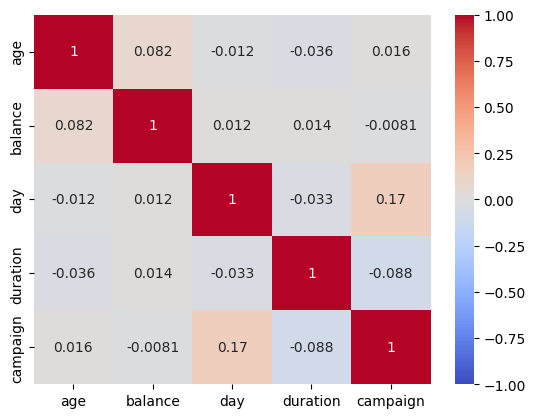

In [4]:
dataplot = sb.heatmap((df[numericalCols]).corr(),vmin=-1, cmap="coolwarm", annot=True)
plt.show()

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

40000 total rows
age
40.5446+/-9.64177550743954
0 number of nulls. 0.0% is null


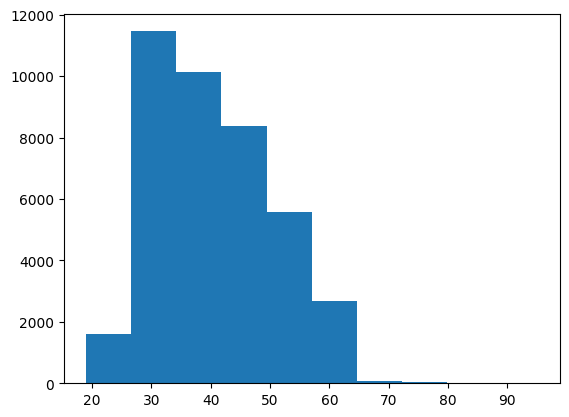

job
job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64
marital
marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64
education
education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: count, dtype: int64
default
default
no     39191
yes      809
Name: count, dtype: int64
balance
1274.27755+/-2903.769715555965
0 number of nulls. 0.0% is null


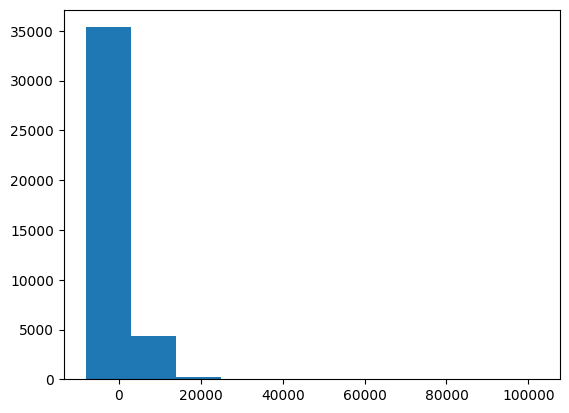

housing
housing
yes    24031
no     15969
Name: count, dtype: int64
loan
loan
no     33070
yes     6930
Name: count, dtype: int64
contact
contact
cellular     24914
unknown      12765
telephone     2321
Name: count, dtype: int64
day
16.017225+/-8.27812729330381
0 number of nulls. 0.0% is null


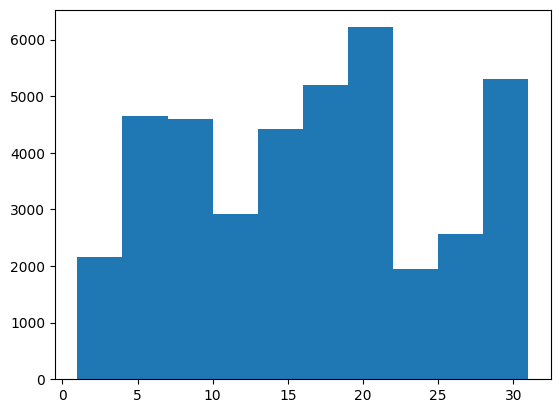

month
month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: count, dtype: int64
duration
254.8243+/-259.3664981334689
0 number of nulls. 0.0% is null


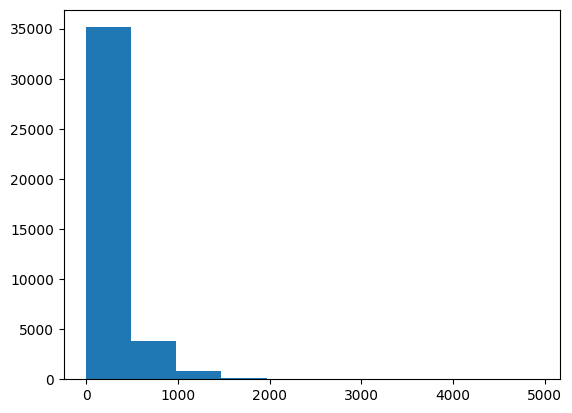

campaign
2.882175+/-3.2390514901346696
0 number of nulls. 0.0% is null


In [ ]:
totalNumberOfRows = df.shape[0]
print(f"{totalNumberOfRows} total rows")
for col in df.columns:
    print(col)
    if np.issubdtype(df[col].dtype, np.number):
        xbar = df[col].mean() #mean
        sigma = df[col].std() #standard deviation
        numberOfNulls = df[df[col].isnull()].shape[0]
        nonNullValues = list(df[~df[col].isnull()][col]) 
        fig = plt.figure()
        plt.hist(nonNullValues)
        print(f"{xbar}+/-{sigma}")
        print(f"{numberOfNulls} number of nulls. {numberOfNulls*100/totalNumberOfRows}% is null")
        plt.show()
    else:
        df[col] = df[col].astype("str")
        print(df[col].value_counts())